* * *
<pre> INSEA                <i> Projet Statistiques Multivariées - 2025 </i></pre>
* * *


<pre align="left"> Mardi 4 Novembre  2025             <i> Author: Hicham Janati </i></pre>
* * *

Consignes:
----------
- Deadline: *Dimanche 7 Décembre 23h59* | tout retard d'1h = -1
- Tout travail doit être effectué par groupe de deux sans exception.
- Il faut nommer le fichier avec le numéro du groupe seulement `groupe_X.ipynb` pas de noms. 
- PAS DE PDF NI DE FICHIER WORD. UN NOTEBOOK UNIQUEMENT.
- Les noms des membres du groupe sont à mentionner en modifiant la ligne suivante:

Membre 1: MINTOAMA Mimpaguibe

Membre 2: Echchakar Haitam

- Ce notebook contient 15 questions.
- Il faut executer tout le notebook (Run all cells) avant de l'envoyer: vérifier que les cellules sont exécutées dans le bon ordre et qu'il n'y a pas d'erreur, je ne vais pas débugger votre code. 
- Le code doit être propre et lisible et surtout comprendre ce qu'il fait par tous les membres du groupe.
- LIVRAISON UNIQUEMENT SUR DROPBOX (TOUT FICHIER ENVOYE PAR MAIL NE SERA PAS OUVERT):

https://www.dropbox.com/request/bs2Tafzm0Bzr7rroAGtc

Vous pouvez effectuer plusieurs uploads, seule la date la plus récente sera corrigée.

- Le but n'est pas de produire du code qui marche: le but est de comprendre et maîtriser les mécanismes derrière et savoir utiliser quoi et quand. Ce notebook est loin d'être self-contained, cherchez, lisez et apprenez à devenir auto-didacte.

# Partie 1: Les données

Les données sont coupés en deux: train et test. Il s'agit d'une liste d'SMS avec leur labels (Y) spam / non spam.

In [1]:
import numpy as np

X_train = np.load("data/X_train.npy", allow_pickle=True)
X_test = np.load("data/X_test.npy", allow_pickle=True)
Y_train = np.load("data/Y_train.npy", allow_pickle=True)
Y_test = np.load("data/Y_test.npy", allow_pickle=True)



<pre style="color:red;">                Aperçu des données </pre>


In [2]:
X_train[:4], Y_train[:4]


(array(['Play w computer? Aiyah i tok 2 u lor?',
        "Well there's not a lot of things happening in Lindsay on New years *sighs* Some bars in Ptbo and the blue heron has something going",
        'Dear are you angry i was busy dear',
        "Carlos'll be here in a minute if you still need to buy"],
       dtype=object),
 array([0, 0, 0, 0]))

In [3]:

import pandas as pd

df_train = pd.DataFrame({
    "SMS": X_train,
    "Label": Y_train
})

pd.set_option('display.max_colwidth', None)
df_train.head()


,SMS,Label
0,Play w computer? Aiyah i tok 2 u lor?,0
1,Well there's not a lot of things happening in Lindsay on New years *sighs* Some bars in Ptbo and the blue heron has something going,0
2,Dear are you angry i was busy dear,0
3,Carlos'll be here in a minute if you still need to buy,0
4,"A boy was late 2 home. His father: \POWER OF FRNDSHIP\""""",0


On rappelle que les données de `test` doivent être utilisées pour évaluer le modèle final comme si elles étaient nouvelles en production -- non disponibles à l'entraînement -- toute opération d'apprentissage (y compris la validation croisée) doit être faite sur les données `train` uniquement.

### Question 1
En utilisant ```CountVectorizer``` de ```scikit-learn``` transformez les données. Quelle est l'utilité de cette opération ?

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# Créaction l’objet vectorizer
vectorizer = CountVectorizer()

# Apprentissage du vocabulaire à partir de X_train et transformation des données
X_train_vec = vectorizer.fit_transform(X_train)

# Transformation de X_test (sans refit, pour utiliser le même vocabulaire)
X_test_vec = vectorizer.transform(X_test)

#
print(X_train_vec.shape)
nb_sms, nb_vocabulaire = X_train_vec.shape
print("le nombre de sms de X_train est :", nb_sms )
print("le nombre de vocabulaire (mots distincts) que le modèle a appris est :", nb_vocabulaire )


(2786, 5870)
le nombre de sms de X_train est : 2786
le nombre de vocabulaire (mots distincts) que le modèle a appris est : 5870


- `Importance :`

CountVectorizer sert à transformer un texte en données numériques pour rendre possible l’utilisation de méthodes mathématiques de statistique multivariée (par ex: ACP, clustering, classification).

#### Question 2:
On modélise les données de chaque classe par une loi multinomiale. En utilisant ```MultinomialNB``` de scikit-learn, fittez un modèle et évaluez sa performance en calculant les scores de précision et de rappel.

<pre style="color:red;">                Fitte des données </pre>


In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score

# Création de l'objet MultinomialNB
model = MultinomialNB()

# Entraînement du modèle sur X_train_vec et Y_train
model.fit(X_train_vec, Y_train)



,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


<pre style="color:red;">                Prédiction sur le jeu de test </pre>


In [6]:

Y_pred_sklearn = model.predict(X_test_vec)


<pre style="color:red;">                Performance du modèle: Précision et rappel</pre>


In [7]:
# Précision : proportion des messages prédits comme spam qui sont réellement spam
precision = precision_score(Y_test, Y_pred_sklearn)

# Rappel : proportion de vrais spams correctement détectés
recall = recall_score(Y_test, Y_pred_sklearn)

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_sklearn, target_names=["Non spam", "Spam"]))
print("-----------------------------------------------")
print(f"Précision : {precision:.2f}")
print(f"Rappel    : {recall:.2f}")


              precision    recall  f1-score   support

    Non spam       0.98      1.00      0.99      2413
        Spam       0.97      0.89      0.93       373

    accuracy                           0.98      2786
   macro avg       0.97      0.94      0.96      2786
weighted avg       0.98      0.98      0.98      2786

-----------------------------------------------
Précision : 0.97
Rappel    : 0.89


`Interprétation`

Le modèle reconnaît tout les SMS non spam (rappel = 1.00) et prédit rarement (2%) de faux SMS non spams(précision = 0.98).

La précision élevée pour les spams (0.97) indique que le modèle ne génère presque pas de faux spams (faux positifs).
Cependant, le rappel(0.89) légèrement plus faible pour cette même classe montre que le modèle laisse échapper environ 11% de spams.


Globalement, le modèle Multinomial Naive Bayes offre d’excellentes performances sur les données avec une performance globale (accuracy) de 98%.

### Question 3:
Implémentez votre propre modèle naive bayes multinomial en utilisant numpy. Comparez avec scikit-learn.

<pre style="color:red;">                Implémentation de notre modèle                         </pre>



$N_c$ ` = nombre de SMS dans la classe c : ici c est soit 0 ou 1 (non Spam ou Spam) `
<br>
$N$ `= Nombre total de SMS (ici dans X_train )`
<br>
$V$ `est le vocabulaire total (nombre de mot unique dans X_train)`
<br>
$W = (w_1​,w_2​,...,w_V​)$ `le vocabulaire`
<br>
$x = (x_1​,x_2​,...,x_V​)$`un message donné, représenté par un vecteur de mots`. $x_j$ = nombre de fois que le mot $w_j$ du vocabulaire se repète dans $x$:
<br>

`La probabilité de la classe (fréquence de la classe)  c est :` $P(c) = \frac{N_c}{N}$
<br>
La probabilité que le message x soit dans c est : $ P(c|x) = \frac{P(x|c)P(c)}{P(x)} $ Avec $ P(x|c) = \prod_{j=1}^{V}{P(w_j|c)^{x_j}}  $ (Vraisemblence)
<br>
`la probabilité que le mot` $w_j$ `soit choisi quand on est dans c :` $P(w_j|c) = \frac{N_{jc}+1}{\sum_{k=1}^{V}{(N_{kc}+1)}} =  \frac{N_{jc}+1}{\sum_{k=1}^{V}{N_{kc} + V}}$
`où` $N_{jc}=$ nombre total d’occurrences du mot $w_j$ dans c et $\sum_{k=1}^{V}{N_{kc}}$ = total de tous les mots observés dans la classe c. `Le +1` pour éviter d'avoir et pou pouvoir fair appel à log.

Comparer les $ P(c|x) $ revient à comparer $P(x|c)P(c)$ car $P(x)$ est indépendant des classes. 
D'où la fonction de `prédiction` est:
$$
\hat{c} \;=\; \arg\max_{c}\; \log\!\big(P(x\mid c)\,P(c)\big)
\;=\; \arg\max_{c}\;\Bigg(\log P(c) \;+\; \sum_{j=1}^{V} x_j \log P(w_j\mid c)\Bigg)
$$


In [8]:
import numpy as np

class MyMultinomialNB:
    def fit(self, X, y):
        self.classes = np.unique(y)
        n_samples, n_features = X.shape
        
        # Prior: P(c)
        self.class_prior = {}
        for c in self.classes:
            self.class_prior[c] = np.sum(y == c) / n_samples
        
        # Likelihood: P(word | class)
        self.likelihood = {}
        for c in self.classes:
            X_c = X[y == c]     # SMS de la classe c
            word_counts = X_c.sum(axis=0)  # somme des occurrences par mot
            
            # Laplace smoothing
            self.likelihood[c] = (word_counts + 1) / (word_counts.sum() + n_features)
        
        return self

    def predict(self, X):
        preds = []
        for x in X:
            class_scores = {}
            for c in self.classes:
                log_prior = np.log(self.class_prior[c])
                log_likelihood = np.sum(x * np.log(self.likelihood[c]))
                class_scores[c] = log_prior + log_likelihood
            
            # classe avec score max
            preds.append(max(class_scores, key=class_scores.get))
        return np.array(preds)


<pre style="color:red;">                Comparaison avec scikit-learn                        </pre>


In [9]:
from sklearn.naive_bayes import MultinomialNB

# --- Entrainement ---
my_nb = MyMultinomialNB()
my_nb.fit(X_train_vec.toarray(), Y_train)
Y_pred_custom = my_nb.predict(X_test_vec.toarray())

# Comparaison des performances
from sklearn.metrics import classification_report

print("MyMultinomialNB:")
print("-----------------------------------------------------")
print(classification_report(Y_test, Y_pred_custom, target_names=["Non spam", "Spam"]))
print("\nSklearn NB")
print("-----------------------------------------------------")
print(classification_report(Y_test, Y_pred_sklearn, target_names=["Non spam", "Spam"]))


MyMultinomialNB:
-----------------------------------------------------
              precision    recall  f1-score   support

    Non spam       0.98      1.00      0.99      2413
        Spam       0.97      0.89      0.93       373

    accuracy                           0.98      2786
   macro avg       0.97      0.94      0.96      2786
weighted avg       0.98      0.98      0.98      2786


Sklearn NB
-----------------------------------------------------
              precision    recall  f1-score   support

    Non spam       0.98      1.00      0.99      2413
        Spam       0.97      0.89      0.93       373

    accuracy                           0.98      2786
   macro avg       0.97      0.94      0.96      2786
weighted avg       0.98      0.98      0.98      2786



`Conclusion`

Après entraînement et évaluation, notre modèle reproduit exactement les résultats obtenus avec MultinomialNB de scikit-learn.

Les métriques de précision, rappel, F1-score et accuracy sont identiques pour chaque classe.
Cela montre que notre implémentation respecte parfaitement les étapes mathématiques du modèle et confirme également que Naive Bayes est un modèle simple, transparent et facile à implémenter, tout en offrant d'excellentes performances sur les données textuelles.

### Question 4:
Afin de comparer avec d'autres modèles qui s'attendent à des inputs continus, on peut utiliser des fréquences de mots au lieu du nombre brut. Appliquez la transformation `TfIdf` de scikit-learn sur les données. Fittez des modèles différents: LDA, régression logistique, QDA et SVM. Essayez de battre la performance du MultinomialNB. 

<pre style="color:red;">                Transformation TF-IDF                       </pre>


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


<pre style="color:red;">                Entraînement du modèle LDA</pre> 
`LDA ne supporte pas les matrices creuses → on convertit en .toarray()`


In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_tfidf.toarray(), Y_train)
Y_pred_lda = lda.predict(X_test_tfidf.toarray())


<pre style="color:red;">                Régression Logistique                       </pre>


In [12]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train_tfidf, Y_train)
Y_pred_logreg = logreg.predict(X_test_tfidf)


<pre style="color:red;">                QDA                       </pre>
`Il nécessite une matrice dense: on ajoute I à la matrice de covariance pour ne pas avoir de problème d'inversibilité (la rendre inversible).`


In [13]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(reg_param=0.5)
qda.fit(X_train_tfidf.toarray(), Y_train)
Y_pred_qda = qda.predict(X_test_tfidf.toarray())


c:\A2_S3\Partie_1\Statistique_Multivariee\Project_NLP_2025\Mienv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\A2_S3\Partie_1\Statistique_Multivariee\Project_NLP_2025\Mienv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


<pre style="color:red;">                SVM                       </pre>


In [14]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_tfidf, Y_train)
Y_pred_svm = svm.predict(X_test_tfidf)


<pre style="color:red;">                Evaluation et Comparaison avec le modèle Multinomial                       </pre>


In [15]:
from sklearn.metrics import classification_report

def evaluate(name, y_true, y_pred):
    print(f"\n---------- {name} ----------")
    print(classification_report(y_true, y_pred, target_names=["Non spam", "Spam"]))    


In [16]:
evaluate("MultinomialNB",Y_test, Y_pred_sklearn)
evaluate("LDA",Y_test, Y_pred_lda)



---------- MultinomialNB ----------
              precision    recall  f1-score   support

    Non spam       0.98      1.00      0.99      2413
        Spam       0.97      0.89      0.93       373

    accuracy                           0.98      2786
   macro avg       0.97      0.94      0.96      2786
weighted avg       0.98      0.98      0.98      2786


---------- LDA ----------
              precision    recall  f1-score   support

    Non spam       0.97      1.00      0.98      2413
        Spam       0.99      0.81      0.89       373

    accuracy                           0.97      2786
   macro avg       0.98      0.90      0.94      2786
weighted avg       0.97      0.97      0.97      2786



In [17]:
evaluate("Régression Logistique",Y_test, Y_pred_logreg)
evaluate("SVM",Y_test, Y_pred_svm)
evaluate("QDA",Y_test, Y_pred_qda)



---------- Régression Logistique ----------
              precision    recall  f1-score   support

    Non spam       0.94      1.00      0.97      2413
        Spam       1.00      0.61      0.76       373

    accuracy                           0.95      2786
   macro avg       0.97      0.80      0.86      2786
weighted avg       0.95      0.95      0.94      2786


---------- SVM ----------
              precision    recall  f1-score   support

    Non spam       0.98      1.00      0.99      2413
        Spam       0.98      0.88      0.93       373

    accuracy                           0.98      2786
   macro avg       0.98      0.94      0.96      2786
weighted avg       0.98      0.98      0.98      2786


---------- QDA ----------
              precision    recall  f1-score   support

    Non spam       0.87      1.00      0.93      2413
        Spam       0.00      0.00      0.00       373

    accuracy                           0.87      2786
   macro avg       0.43      

c:\A2_S3\Partie_1\Statistique_Multivariee\Project_NLP_2025\Mienv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\A2_S3\Partie_1\Statistique_Multivariee\Project_NLP_2025\Mienv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\A2_S3\Partie_1\Statistique_Multivariee\Project_NLP_2025\Mienv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

`L'entrainement du modèle QDA n'a pas marché`

Les deux modèles les plus performants sont Multinomial Naive Bayes et le SVM linéaire, qui atteignent tous deux une accuracy de 98% et un f1-score de 0.93 pour la classe Spam.

LDA obtient une accuracy légèrement faible (97%) par rapport aux deux premiers et réduit fortement le rappel sur la classe Spam.
La régression logistique est la moins performante, avec un rappel de seulement 61% sur la classe Spam : elle prédit trop souvent la classe majoritaire.

Ces résultats montrent que :

- `la TF-IDF ne garantit pas une amélioration des performances`;

- `les modèles linéaires marginaux (SVM) ou probabilistes adaptés au texte (MultinomialNB) restent les meilleurs choix pour cette tâche`;

- les modèles génératifs à base gaussienne (LDA) ou discriminatifs mal régularisés (régression logistique) et la QDA sont moins adaptés aux données textuelles sparse et de haute dimension.

### Question 5:
Visualisez la PCA et tSNE des données transformées.


<pre style="color:red;">                PCA = réduction linéaire → garde les directions de plus grande variance                       </pre>


In [18]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# pour PCA, on utilise une matrice dense.
X_dense = X_train_tfidf.toarray()
pca_full = PCA().fit(X_dense)

# PCA à 2 composantes pour la visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_dense)


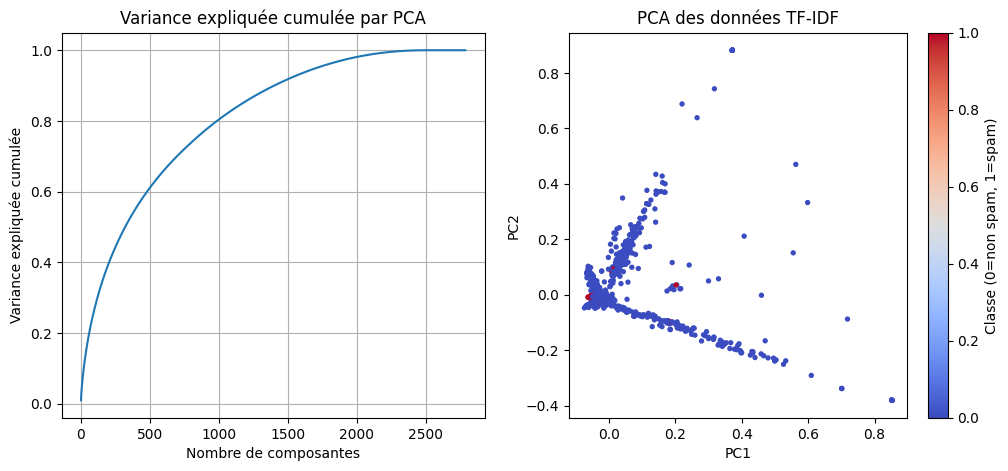

Variance expliquée par les deux premières composantes:  1.95%


In [19]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée cumulée")
plt.title("Variance expliquée cumulée par PCA")
plt.grid()
    
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=Y_train, cmap="coolwarm", s=8)
plt.title("PCA des données TF-IDF")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Classe (0=non spam, 1=spam)")
plt.show()

print(f"Variance expliquée par les deux premières composantes: {(pca_full.explained_variance_ratio_[0]+pca_full.explained_variance_ratio_[1])*100: .2f}%")


Les données TF-IDF ne sont pas du tout séparées dans les deux premières composantes de la PCA.
<br>
Cela est cohérent avec la faible variance expliquée(<2%) par PC1 et PC2 et il faut au moins 500 premières composantes pour espérer expliquer 60% d'information.
<br>
La PCA 2D n’est donc pas suffisante pour représenter la structure réelle et ne permet pas une séparation visible des deux classes.

<pre style="color:red;">                t-SNE = réduction non linéaire → révèle la structure par clusters (spam vs non spam)                       </pre>


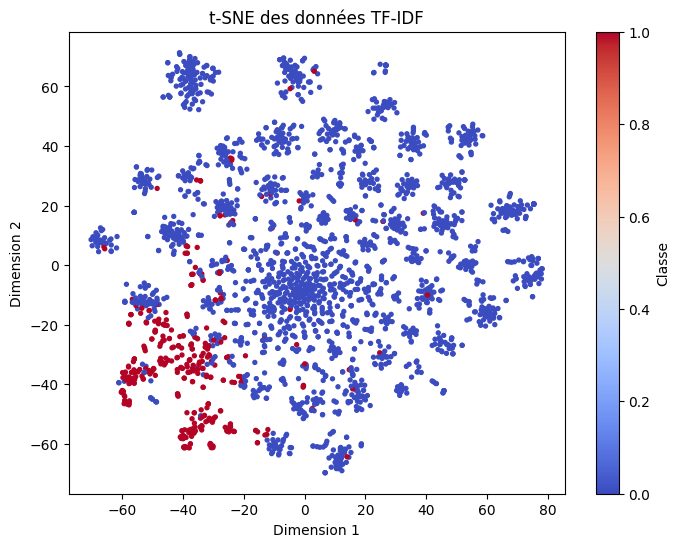

In [20]:
from sklearn.manifold import TSNE

# Réduction initiale à 500 dimensions
pca50 = PCA(n_components=50)
X_50 = pca50.fit_transform(X_dense)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, max_iter=1500)
X_tsne = tsne.fit_transform(X_50)

# Visualisation
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=Y_train, cmap="coolwarm", s=8)
plt.title("t-SNE des données TF-IDF")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar(label="Classe")
plt.show()


Le t-SNE fournit une visualisation plus informative que la PCA.
On y observe que les spams forment un cluster presque bien défini, tandis que les non-spams sont plus dispersés.
Avec `un séparateur non linéaire`, on peut essayer(ça ne serait parfait) de séparer une zone pour les spams et une autre pour les non-spams.

# Partie II: Introduction au NLP

Dans cette partie on utilise des transformations plus avancées basées sur la factorisation matricielle. L'un des premiers modèles à grand succès pour représenter les mots est `Word2Vec`. Étant donné un vocabulaire de taille V, on peut représenter un input par un vecteur binaire de taille V (one-hot encoding). Par exemple si le vocabulaire est
```["rouge", "chat", "souris", "courir", "mange", "ordinateur", "la", "le", ...]``` 
Alors on peut représenter chaque mot par son vecteur one-hot de taille V:
- "chat" -> [0, 1, 0, 0, 0, ...]
- "ordinateur" -> [0, 0, 0, 0, 0, 1, 0, ...]

La phrase "le chat mange la souris" peut être représentée par [0, 1, 1, 0, 1, 0, 1, 1, ...].

On construit un réseau de neurones simple capable de prédire le mot manquant au milieu d'une phrase avec des données comme:
- "le chat la souris" -> "mange"
- "la matrice est pas inversible" -> "n'" 
...
Ainsi, l'input du réseau doit être un vecteur de taille V. L'output doit être également **un vecteur de probabilités** de taille V. On prédit le mot avec la plus grande probabilité.

On considère un réseau de neurones à une couche cachée de dimension M (M neurones). Le réseau de neurones doit en sortie prédire un mot caché. Soit $x \in \mathbb R^V$ un one-hot vecteur. Le réseau de neurones peut être défini formellement comme suit. Soit $W_{in} \in \mathbb{R}^{V \times M}$ et $W_{out} \in \mathbb{R}^{M \times V}$. 

$$ g(x) = W_{out}(W_{in}x) \in \mathbb R^{V} $$

Pour obtenir un vecteur output positif et sommant à 1 (des probabilités sur les mots), on applique la fonction softmax:
$$ softmax: z \in \mathbb R^V \mapsto \left[\frac{e^{z_1}}{\sum_j e^{z_j}}, \dots, \frac{e^{z_V}}{\sum_j e^{z_j}}  \right]^\top$$

Ainsi on définit: $ neuralnet(x) = softmax(g(x))$ et on entraîne le modèle avec la loss cross-entropy.
 
Après avoir entraîné le modèle, les ligne de la matrice $W_{in}$ sont les embeddings des mots du vocabulaire.


On commence par télécharger le modèle word2vec (peut prendre du temps):

In [21]:
import gensim.downloader as api

word2vec = api.load("word2vec-google-news-300")


word2vec est n'est qu'un dictionnaire spécial "mot" -> vecteur:


In [22]:
word2vec


In [23]:
word2vec["computer"]


array([ 1.07421875e-01, -2.01171875e-01,  1.23046875e-01,  2.11914062e-01,
       -9.13085938e-02,  2.16796875e-01, -1.31835938e-01,  8.30078125e-02,
        2.02148438e-01,  4.78515625e-02,  3.66210938e-02, -2.45361328e-02,
        2.39257812e-02, -1.60156250e-01, -2.61230469e-02,  9.71679688e-02,
       -6.34765625e-02,  1.84570312e-01,  1.70898438e-01, -1.63085938e-01,
       -1.09375000e-01,  1.49414062e-01, -4.65393066e-04,  9.61914062e-02,
        1.68945312e-01,  2.60925293e-03,  8.93554688e-02,  6.49414062e-02,
        3.56445312e-02, -6.93359375e-02, -1.46484375e-01, -1.21093750e-01,
       -2.27539062e-01,  2.45361328e-02, -1.24511719e-01, -3.18359375e-01,
       -2.20703125e-01,  1.30859375e-01,  3.66210938e-02, -3.63769531e-02,
       -1.13281250e-01,  1.95312500e-01,  9.76562500e-02,  1.26953125e-01,
        6.59179688e-02,  6.93359375e-02,  1.02539062e-02,  1.75781250e-01,
       -1.68945312e-01,  1.21307373e-03, -2.98828125e-01, -1.15234375e-01,
        5.66406250e-02, -

On peut obtenir l'embedding de plusieurs mots directement dans une liste. L'embedding d'une phrase est souvent défini comme la moyenne des embeddings de ses mots.

In [24]:
word2vec[["computer", "mouse", "keyboard"]].shape


(3, 300)

In [25]:
word2vec[["I", "love", "computers"]].mean(axis=0).shape


(300,)

### Question 6
Pour appliquer word2vec aux SMS, il faut d'abord les découper en mots. Implémentez une fonction naïve qui transforme un SMS en liste de mots ou _tokens_. C'est ce qu'on appelle un tokenizer.

In [26]:
import re

def tokenize_sms(sms):
    """
    Transforme un SMS en liste de mots (tokens).
    """
    # transformation en minuscules
    sms = sms.lower()
    # on garde lettres ET chiffres
    sms = re.sub(r'[^a-z0-9\s]', ' ', sms)
    # découpage en mots
    tokens = sms.split()
    return tokens

# Exemple
sms = "Hello! This is a test SMS, 123."
print(tokenize_sms(sms))


['hello', 'this', 'is', 'a', 'test', 'sms', '123']


### Question 7
On peut vérifier si un mot fait partie du vocabulaire avec le test:

In [27]:
"computer" in word2vec


True

Proposez une solution pour appliquer word2vec aux données SMS. Est-il meilleur comme embedding comparé au `CountVectorizer` ?

Les mots dans `word2vec` sont de dimension 300, on prend donc dim = 300

In [28]:
def sms_to_vec(tokens, model, dim=300):
    """
    Transforme un SMS tokenisé en vecteur en moyennant les embeddings Word2Vec.
    """
    vecs = []
    for word in tokens:
        if word in model:
            vecs.append(model[word])
    if len(vecs) == 0:
        # si aucun mot du SMS n'est dans le vocabulaire, retourner un vecteur nul
        return np.zeros(dim)
    return np.mean(vecs, axis=0)

# Exemple
sms_vec = sms_to_vec(tokenize_sms("I love my computer"), word2vec)
print(sms_vec.shape) 


(300,)


<pre style="color:red;">                Comparaison à CountVectorizer                        </pre>


In [29]:
#
X_train_tokens = [tokenize_sms(s) for s in X_train]
X_test_tokens  = [tokenize_sms(s) for s in X_test]

#
X_train_w2v = np.array([sms_to_vec(tokens, word2vec) for tokens in X_train_tokens])
X_test_w2v  = np.array([sms_to_vec(tokens, word2vec) for tokens in X_test_tokens])


In [30]:
#
from sklearn.linear_model import LogisticRegression
clf_w2v = LogisticRegression(max_iter=2000)
clf_w2v.fit(X_train_w2v, Y_train)

Y_pred_w2v_L = clf_w2v.predict(X_test_w2v)

#
evaluate("CountVectorizer + MultinomialNB",Y_test,Y_pred_sklearn)
evaluate("Word2Vec + LogisticRegression",Y_test,Y_pred_w2v_L)



---------- CountVectorizer + MultinomialNB ----------
              precision    recall  f1-score   support

    Non spam       0.98      1.00      0.99      2413
        Spam       0.97      0.89      0.93       373

    accuracy                           0.98      2786
   macro avg       0.97      0.94      0.96      2786
weighted avg       0.98      0.98      0.98      2786


---------- Word2Vec + LogisticRegression ----------
              precision    recall  f1-score   support

    Non spam       0.97      0.99      0.98      2413
        Spam       0.91      0.77      0.84       373

    accuracy                           0.96      2786
   macro avg       0.94      0.88      0.91      2786
weighted avg       0.96      0.96      0.96      2786



<pre style="color:red;">                Conclusion                       </pre>


- Sur notre dataset, CountVectorizer associé à un MultinomialNB donne une meilleure performance que Word2Vec avec une régression logistique. Cela s’explique par la taille limitée des données et la simplicité du problème, où la fréquence des mots suffit pour une bonne classification.

- Word2Vec reste intéressant pour comprendre les embeddings et les relations entre mots, même si la performance brute est un peu plus faible.

`Word2vec` (2013) est l'un des premiers modèles de représentation vectorielle du langage naturel. L'une de ses limitations principales est le fait de ne pas pouvoir représenter des mots (ou bouts de mots) non-vus lors de l'entraînement. Quelques années plus tard, plusieurs avancées ont été introduites pour y remédier:

### 1) Améliorer la tokenization:
1. Au lieu de considérer un vocabulaire avec des mots, on considère un vocabulaire avec les mots, et les bouts de mots (ngrams):

    "diagonalisation matricielle" -> "diagonal", "isation", " ", "matric", "ielle". 

    Ceci est utilisé dans le modèle `fastText` (2016) dont l'architecture est similaire à celle de Word2Vec.

2. WordPiece: approche bottom-up où le vocabulaire des tokens est construit en mergeant les caractères (a-Z, 0-9, symboles et ponctuation) + Ajouter des tokens spéciaux "[UNK]" (unknow) pour gérer les tokens non-vus, "[SEP]" (séparateur entre phrases ou textes), "[MASK]" (token qui veut dire "ce mot est à prédire") etc. Ce tokenizer est utilisé dans l'un des premiers modèles basés sur l'architecture Transformer (BERT) (2018).

3. Byte-pair encoding (BPE): similaire à WordPiece mais à l'échelle du byte.  Ceci permet d'encoder n'importe quel string dans n'importe quelle langue: mots rares, typos, emojis, kanji... C'est le tokenizer adopté par l'un des fameux modèles de traduction à l'époque (Neural Machine Translation -- NMT 2015) pour traduire les mots rares; et ensuite par les modèles GPT (2018). Avec BPE, on n'a plus besoin du token spécial _unknown_ [UNK]. Vous pouvez voir comment le texte est tokenisé par GPT en visitant https://platform.openai.com/tokenizer. 

### 2) Améliorer l'architecture

1. Limites de Word2Vec et companie:

La nature des données de langage est séquentielle (comme les séries temporelles, mot après mot..), or les modèles comme Word2Vec et ses variantes (Fasttext, GloVe) ne prennent pas en considération l'ordre des mots: ils sont appliqués à des _bag of words_. En plus, même si ses modèles utilisent le contexte voisin, après l'entraînement, l'embedding d'un mot est le même quelque soit son contexte ce qui limite la compréhension des différentes nuances d'un même mot. 

2. Recurrent Neural Networks:

L'architecture des réseaux de neurones récurrents (RNN) et ses variantes (LSTM, GRU) développés principalement dans les années 1990 sont revisités en (2013-2020) après le succès du deep learning (2012+) avec la réalisation de la grande puissance de calcul des GPUs. Ils permettent de prendre en considération l'aspect temporel des données mais restent difficiles à entraîner (nécessitent beaucoup de temps + instabilité des gradients). 

3. Transformers (en très bref):

En 2017, l'architecture des Transformers est introduite. Son avantage principal est son formalisme matriciel qui est beaucoup plus parallélisable que les RNNs, et donc permet d'entraîner des modèles plus grands sur des données beaucoup plus grandes. Prenons le cas d'une architecture générative (GPT). Un transformer définit une structure appelée _Self-Attention Head_ qui fonctionne comme suit.
Étant donnés les embeddings (statiques comme ceux de Word2Vec) des tokens d'une phrase, le mécanisme d'attention consiste à calculer des scores de similarités (produits scalaires) entre chaque paire d'embeddings, ceci permet d'obtenir une matrice de scores "d'attention" entre les tokens.

Par exemple, pour une phrase "Il me faut un tapis pour la souris Logitec", l'embedding du mot "souris" sera pondéré par ses scores de similarité avec chacun des autres mots ["Il", "me", "faut", "un", "tapis", "pour", "la", "logitec"]. Ainsi, l'embedding d'un même mot dépend du contexte. Ceci permettra de distinguer la souris (animal) de la souris d'ordinateur.

 Ceci reste une explication très simpliste du mécanisme d'attention, pour visualiser le concept, regardez la vidéo de 3b1b https://www.youtube.com/watch?v=eMlx5fFNoYc.







## III Partie 3 - Embeddings basés sur les transformers

Dans cette partie, on passe à l'artillerie lourde: embeddings basés sur les transformers. On utilise ceux de BERT plutôt que GPT car BERT a été conçu pour la classification supervisée alors que GPT pour la génération de texte: l'embedding de BERT est plus pertinent pour notre problématique.

On commence par tokeniser les données. Voici ce que donne le tokenizer avec une phrase par exemple:

In [31]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")


c:\A2_S3\Partie_1\Statistique_Multivariee\Project_NLP_2025\Mienv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 30721b67-9730-40e9-a963-351b3fd50c80)')' thrown while requesting HEAD https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json
Retrying in 1s [Retry 1/5].


In [32]:
text = "Hey, are you free tomorrow at 8 ? gotta catch up bud."
tokens = tokenizer.tokenize(text)
tokens


['hey',
 ',',
 'are',
 'you',
 'free',
 'tomorrow',
 'at',
 '8',
 '?',
 'gotta',
 'catch',
 'up',
 'bud',
 '.']

Le modèle BERT en revanche ne s'attend pas à des tokens en texte, mais aux token_ids:

In [33]:
text = "Hey, are you free tomorrow at 8 ? gotta catch up bud"
token_ids = tokenizer(text, return_tensors="pt")
token_ids


{'input_ids': tensor([[  101,  4931,  1010,  2024,  2017,  2489,  4826,  2012,  1022,  1029,
         10657,  4608,  2039, 13007,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

On fait appel ensuite au modèle BERT. On peut voir les composants de son architecture:

In [34]:
bert_model = AutoModel.from_pretrained("bert-base-uncased")
bert_model.eval()
bert_model


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

On applique le modèle aux token_ids sans calcul de gradient:

In [35]:
import torch
with torch.no_grad():
    outputs = bert_model(**token_ids)
outputs


BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.3836,  0.0548, -0.0066,  ..., -0.2580,  0.3390,  0.2724],
         [ 0.6628, -0.0560,  0.9965,  ...,  0.0643,  1.2164, -0.4075],
         [ 0.1342,  0.0883,  0.7119,  ..., -0.0816,  1.2578,  0.1409],
         ...,
         [ 0.8804, -0.9000,  0.7776,  ...,  0.3333,  0.4174, -0.7230],
         [ 0.4084, -0.3247,  0.8299,  ...,  0.8601,  0.5027, -0.3476],
         [ 0.4914,  0.0527, -0.1084,  ..., -0.1167, -0.4205, -0.2667]]]), pooler_output=tensor([[-8.6382e-01, -5.2100e-01, -9.1143e-01,  7.4742e-01,  6.9650e-01,
         -2.0079e-01,  8.5602e-01,  3.7551e-01, -7.7920e-01, -9.9999e-01,
         -4.6733e-01,  8.6761e-01,  9.8091e-01,  5.1904e-01,  9.3339e-01,
         -7.2372e-01, -2.1201e-01, -6.3463e-01,  3.1704e-01, -3.3231e-01,
          7.0444e-01,  9.9999e-01,  5.4936e-02,  3.5607e-01,  5.5947e-01,
          9.8429e-01, -7.8516e-01,  9.2725e-01,  9.5860e-01,  7.1539e-01,
         -6.2374e-01,  1.7224e-01, -

On peut accéder aux embeddings en cherchant la dernière couche cachée:

In [36]:
outputs.last_hidden_state


tensor([[[ 0.3836,  0.0548, -0.0066,  ..., -0.2580,  0.3390,  0.2724],
         [ 0.6628, -0.0560,  0.9965,  ...,  0.0643,  1.2164, -0.4075],
         [ 0.1342,  0.0883,  0.7119,  ..., -0.0816,  1.2578,  0.1409],
         ...,
         [ 0.8804, -0.9000,  0.7776,  ...,  0.3333,  0.4174, -0.7230],
         [ 0.4084, -0.3247,  0.8299,  ...,  0.8601,  0.5027, -0.3476],
         [ 0.4914,  0.0527, -0.1084,  ..., -0.1167, -0.4205, -0.2667]]])

### Question 8
Expliquez la dimension obtenue de ces embeddings. On souhaite obtenir les embeddings de toutes les données directement. Appliquez la tokenization à la liste de textes suivante. Quel problème se pose ? Comment y remédier ?

<pre style="color:red;">                Dimension de ces embeddings                       </pre>


In [37]:
outputs.last_hidden_state.shape


torch.Size([1, 15, 768])

<pre style="color:;">On a obtenu une dimension de [1, 15, 768]   qui represente : (batch_size, sequence_length, hidden_size)
- batch_size = nombre de phrases traitées : ici une seule phrase d'où batch_size = 1.
- sequence_length = nombre de tokens (après tokenisation) :  ici 15
- hidden_size = 768 qui est propre à bert-base-uncased : Chaque token est un vecteur de dimension 768

                   </pre>


In [38]:
texts = ["Hey, are you free tomorrow at 8 ? gotta catch up bud.", "Sure thing, let's go."]


<p>

<pre style="color:red;">                Application                      </pre>
Quand on tokenise une liste de textes, les phrases n’ont pas forcement la même longueur après tokenisation (ce qui est notre cas). Le tokenizer ne peut donc pas convertir ces listes en un tenseur PyTorch rectangulaire, ce qui provoque l’erreur ValueError: expected sequence of length X (got Y).

Pour y remédier, il faut activer le padding automatique (et ausssi tronquer au cas où des phrases seraient trop longues):
</p>


In [39]:
token_ids = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)


### Question 9
Après avoir fixé le problème, analysez les tokens obtenus et le `attention_mask` de l'output. Comment peut-on savoir où le `padding` a été appliqué ?

In [40]:
token_ids


{'input_ids': tensor([[  101,  4931,  1010,  2024,  2017,  2489,  4826,  2012,  1022,  1029,
         10657,  4608,  2039, 13007,  1012,   102],
        [  101,  2469,  2518,  1010,  2292,  1005,  1055,  2175,  1012,   102,
             0,     0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]])}

<pre style="color:red;">                Analyse du résultat                       </pre>


In [41]:
print(token_ids['input_ids'])
print('-----------------------------------------------------------------------')
print(token_ids['attention_mask'])


tensor([[  101,  4931,  1010,  2024,  2017,  2489,  4826,  2012,  1022,  1029,
         10657,  4608,  2039, 13007,  1012,   102],
        [  101,  2469,  2518,  1010,  2292,  1005,  1055,  2175,  1012,   102,
             0,     0,     0,     0,     0,     0]])
-----------------------------------------------------------------------
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]])


Les `input_ids` représentent les`tokens`:
Après avoir appliqué la tokenisation avec padding=True, les séquences ont été complétées par des tokens 0 (token de padding).
On peut identifier précisément les positions où le padding a été ajouté grâce au attention_mask :

Les positions où `attention_mask = 1` correspondent à de vrais tokens.

Les positions où `attention_mask = 0` correspondent au padding ajouté automatiquement pour homogénéiser la taille des séquences du batch.

Dans notre exemple, la seconde phrase est plus courte : les `six derniers tokens` sont du `padding`.

### Question 10
L'embedding d'une phrase est la moyenne des embeddings de ses tokens. Appliquez BERT à une liste des donnés spams (X_train[:10]). Calculez le temps pris par cette opération en utilisant la librairie `time`. 

In [42]:
import time
import torch
from transformers import AutoTokenizer, AutoModel

# Chargement : tokenizer et modèle
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
bert_model = AutoModel.from_pretrained("bert-base-uncased")
bert_model.eval()

# 
texts = X_train[:10].tolist()

# 
start = time.time()

# Tokenization en batch
encodings = tokenizer(
    texts,
    padding=True,
    truncation=True,
    return_tensors="pt"
)

# Passage dans BERT
with torch.no_grad():
    outputs = bert_model(**encodings)

# embeddings token-level : (batch, seq_len, hidden_size)
token_embeddings = outputs.last_hidden_state

# embedding de phrase = moyenne des tokens (masque pour ignorer padding)
attention_mask = encodings.attention_mask.unsqueeze(-1)
masked_embeddings = token_embeddings * attention_mask
sentence_embeddings = masked_embeddings.sum(dim=1) / attention_mask.sum(dim=1)

end = time.time()

print("Shape des embeddings de phrase :", sentence_embeddings.shape)
print("Temps d'exécution pour 10 phrases :", end - start, "secondes")


'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: a9e6d185-9bd5-4c9f-9590-d2986e46730b)')' thrown while requesting HEAD https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json
Retrying in 1s [Retry 1/5].
'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 29c789b0-20d5-45ef-b054-479cb72aa1f8)')' thrown while requesting HEAD https://huggingface.co/bert-base-uncased/resolve/main/config.json
Retrying in 1s [Retry 1/5].


Shape des embeddings de phrase : torch.Size([10, 768])
Temps d'exécution pour 10 phrases : 0.8324558734893799 secondes


### Question 11
Avec une GPU, ce calcul peut être jusqu'à 100x fois plus rapide. On vous fournit les embeddings des données `X_train` et `X_test` calculés avec BERT. Refaire l'étape de visualisation et classification avec ces embeddings pour comparer. 

In [43]:
import numpy as np
X_train_bert = np.load("data/embeddings_train.npy")
X_test_bert = np.load("data/embeddings_test.npy")

# Normalisation des données
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bert)
X_test_scaled  = scaler.transform(X_test_bert)

# Réduction de dimension
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)


- `Visualisation`

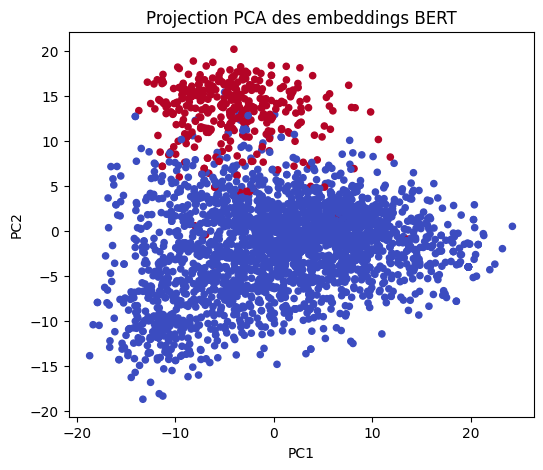

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=Y_train, cmap="coolwarm", s=20)
plt.title("Projection PCA des embeddings BERT")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()



- `Classification`

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression(max_iter=2000)
clf.fit(X_train_scaled, Y_train)

Y_pred = clf.predict(X_test_scaled)

print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2413
           1       0.99      0.95      0.97       373

    accuracy                           0.99      2786
   macro avg       0.99      0.97      0.98      2786
weighted avg       0.99      0.99      0.99      2786



- `Comparaison`

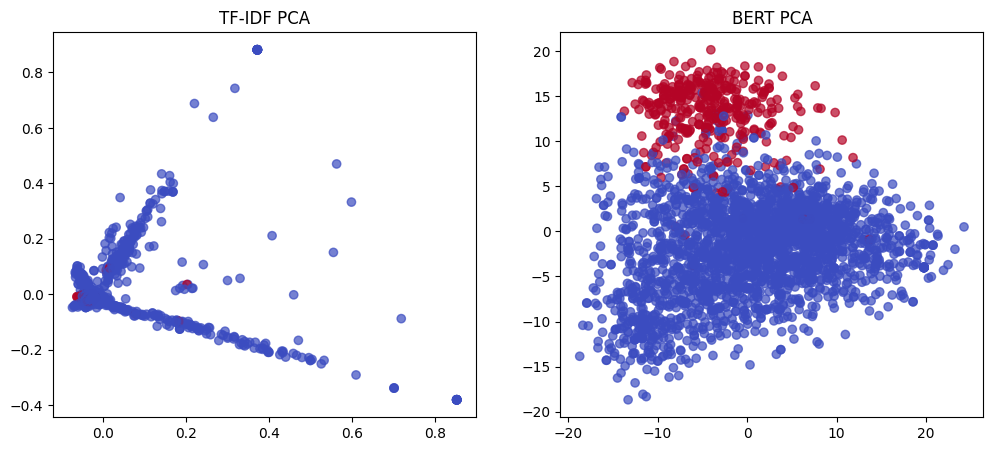

In [46]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=Y_train, cmap="coolwarm", alpha=0.7)
plt.title("TF-IDF PCA")

plt.subplot(1,2,2)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=Y_train, cmap="coolwarm", alpha=0.7)
plt.title("BERT PCA")

plt.show()


`Conclusion`

Contrairement aux données `TfIdf` où la PCA n'a rien tirer comme information pour de faible dimension, sur les `embellings calculés avec BERT`elle visualise proprement les clusers `spams` des `non-spams`. ET avec un `séparateur linéaire (ici une droite)`, on peut séparer ces deux classes.

On obtient une précision de 99% pour les deux classes (99% de prédiction correcte) avec un rappel de 100% pour les non-spams et 95% pour les spams (seul 5% des spams sont délaissés.) Et une performance globale de 99%.C'est un Modèle à la limite du parfait.

# IV Partie 4: Data drift 
En production, les données nouvelles peuvent devenir de plus en plus différentes des données d'entraînement avec le temps: on parle de _data drift_ ou de _distribution shift_. Il faut alors réentraîner le modèle sur des données plus récentes. 


### Question 12
Appliquez une PCA pour la réduire et implémentez un test statistique pour comparer les moyennes des embeddings Train et Test.

In [47]:
from sklearn.decomposition import PCA

# Réduction de dimension (à 50)
pca = PCA(n_components=50)
X_train_reduced = pca.fit_transform(X_train_bert)
X_test_reduced = pca.transform(X_test_bert)


`Test de Hotelling T²` 

Hotelling T² compare les moyennes de deux vecteurs multidimensionnels.


In [48]:
import numpy as np
from scipy.stats import f

def hotelling_t2(X, Y):
    n1, p = X.shape
    n2, _ = Y.shape
    
    mean1 = X.mean(axis=0)
    mean2 = Y.mean(axis=0)

    # Matrice de covariance poolée
    S1 = np.cov(X, rowvar=False)
    S2 = np.cov(Y, rowvar=False)
    Sp = ((n1-1)*S1 + (n2-1)*S2) / (n1+n2-2)

    diff = mean1 - mean2
    T2 = (n1*n2)/(n1+n2) * diff.T @ np.linalg.inv(Sp) @ diff

    # Conversion en statistique F
    F_stat = ( (n1+n2-p-1) * T2 ) / ( p * (n1+n2-2) )
    df1, df2 = p, (n1+n2-p-1)
    p_value = 1 - f.cdf(F_stat, df1, df2)
    
    return T2, F_stat, p_value

T2, F_stat, p_value = hotelling_t2(X_train_reduced, X_test_reduced)
print("Statistique Hotelling T² =", T2)
print("Statistique Fisher F =", F_stat)
print("p-value =", p_value)


Statistique Hotelling T² = 38.01301281732498
Statistique Fisher F = 0.7535721499621227
p-value = 0.8994690899691622


- l'hypothèse $H_0 : \mu = 0$ corespond à `pas de drift détecté` (c'est-à-dire $\mu_{train} = \mu_{test}$)
- $H_1 : \mu ≠ 0$ corespond à `drift détecté`

On a obtenu une p-value de 0.87 > 0.05 donc `on garde` $H_0$ au seuil de 5% même  au seuil de 80%, on garde $H_0$.
Avec une p-value `aussi élevé`, on peut donc conclure qu'il `n'y a pas de drift détecté`

### Question 13
En pratique, comparer les moyennes des distributions n'est pas suffisant pour détecter le drift. Si on obtient les vrais labels (même avec un petit retard), alors  on peut calculer les métriques de performances (précision, rappel) au cours du temps. Sinon, on peut chercher à prédire si un échantillon vient du train ou du test ! L'idée est: si un modèle ML est capable de les distinguer: il y a forcément un drift. Trouvez le meilleur modèle capable de le faire en utilisant les embeddings de BERT. 

`On construit un classifieur binaire qui doit prédire :`

0 = embedding provenant du train

1 = embedding provenant du test

- Si le modèle réussit bien ⇒ les distributions diffèrent ⇒ drift détecté.
- Si le modèle échoue ⇒ les distributions sont proches.

``Construction du dataset "train vs test"``

In [49]:
# Labels : train = 0, test = 1
y_train_model = np.zeros(X_train_bert.shape[0])
y_test_model = np.ones(X_test_bert.shape[0])

# Corrélation
X = np.vstack([X_train_bert, X_test_bert])
Y = np.concatenate([y_train_model, y_test_model])


`Split train/validation pour évaluer correctement`

In [50]:
from sklearn.model_selection import train_test_split

X_clf_train, X_clf_val, Y_clf_train, Y_clf_val = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)


`Test sur plusieurs modèles ML`

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

models = {
    "LogReg": LogisticRegression(max_iter=500),
    "RandomForest": RandomForestClassifier(n_estimators=200),
    "SVM": SVC(kernel='rbf'),
    "MLP": MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=300)
}

from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd

def eval_model(model):
    model.fit(X_clf_train, Y_clf_train)
    y_pred = model.predict(X_clf_val)
    return {
        'Accuracy': accuracy_score(Y_clf_val, y_pred),
        'Precision': precision_score(Y_clf_val, y_pred),
        'Recall': recall_score(Y_clf_val, y_pred),
    }


results = {}
for name, model in models.items():
    results[name] = eval_model(model)
    
df_results = pd.DataFrame(results).T  # Transpose pour modèles en lignes
print(df_results)


              Accuracy  Precision    Recall
LogReg        0.509417   0.509225  0.495512
RandomForest  0.478924   0.477860  0.464991
SVM           0.496861   0.496466  0.504488
MLP           0.502242   0.501608  0.560144


`Meilleur modèle`

 <pre style="color:red;">                Conclusion                     </pre>

Nous avons posé un problème de classification binaire « train vs test » à partir des embeddings BERT. Plusieurs classifieurs ont été testés (régression logistique, SVM, Random Forest, MLP).

Les modèles ont pratiquement les même `accuracy`, même `précision` et `rappel` (au tour de 50%) mais les deux meilleurs sont la `Régression Logistique` et la `SVM`.

Comme ces modèles  `ne parvient pas` à distinguer les données d’entraînement des données test (car `accuracy` proche de `50%`), nous concluons qu'aucun `drift` n'a été détecté significativement .

## V Partie 5: Modélisation non supervisée

#### Question 14
Sans utiliser les labels, modéliser en utilisant le modèle GMM de `scikit-learn` les données (BERT embeddings + PCA) en utilisant quelques modèles différents (nombre de composantes 2 vs 3 -- et type de covariance). Comparez les performances avec les vrais labels.

`Comme on a besoin de garder le sens des mots dans leurs contextes, on ne va donc pas normaliser les données en plus avec GMM la normalisation des données Bert n'est pas nécessaire`

`Réduction de dimension`

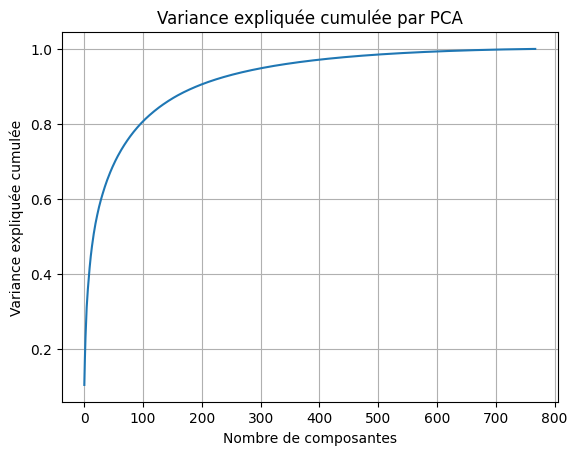

In [52]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt
import seaborn as sns


pca_full = PCA().fit(X_train_bert)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée cumulée")
plt.title("Variance expliquée cumulée par PCA")
plt.grid()


Les 100 premières composantes expliquent plud de 80% de l'information, on peut donc réduire la dimension à 100 et faire entrainer le model.

In [53]:
# ---  paramètres ---
pca_components = 100   
cov_types = ['spherical', 'diag', 'tied','full'] 
n_components_list = [2, 3, 4, 5]

# ---  PCA (fit sur train embeddings) ---

pca = PCA(n_components=pca_components, random_state=42)
X_train_reduced = pca.fit_transform(X_train_bert)


In [54]:
results = []

# util: mapping cluster labels -> true labels pour calculer "accuracy"
def cluster_accuracy(y_true, y_pred):
    # matrice de  confusion (Hungarian matching)
    cm = confusion_matrix(y_true, y_pred)
    # maximize sum over assignment
    row_ind, col_ind = linear_sum_assignment(-cm)
    acc = cm[row_ind, col_ind].sum() / y_true.size
    return acc

# ---  Entraînement GMM pour chaque combo ---
for n_comp in n_components_list:
    for cov in cov_types:
        gmm = GaussianMixture(n_components=n_comp, covariance_type=cov, random_state=42, n_init=5)
        gmm.fit(X_train_reduced)
        cluster_labels = gmm.predict(X_train_reduced)  # affectation des clusters 

        # ---  Évaluation par rapport aux labels réels (pour la comparaison) ---
        ari = adjusted_rand_score(Y_train, cluster_labels)
        nmi = normalized_mutual_info_score(Y_train, cluster_labels)
        acc = cluster_accuracy(Y_train, cluster_labels)

        results.append({
            'n_components': n_comp,
            'covariance_type': cov,
            'ARI': ari,
            'NMI': nmi,
            'ACC_via_hungarian': acc
        })

# ---  Résumé et tri des meilleurs modèles ---
import pandas as pd
df_results = pd.DataFrame(results).sort_values(by='ARI', ascending=False)
print(df_results)


    n_components covariance_type       ARI       NMI  ACC_via_hungarian
6              3            tied  0.330142  0.467945           0.686648
10             4            tied  0.315946  0.424685           0.723618
7              3            full  0.290208  0.432224           0.607681
4              3       spherical  0.289742  0.448360           0.589017
5              3            diag  0.224083  0.352344           0.550610
14             5            tied  0.207400  0.357579           0.623116
8              4       spherical  0.195499  0.365788           0.491744
11             4            full  0.173970  0.348317           0.462312
9              4            diag  0.163908  0.312812           0.469131
12             5       spherical  0.153067  0.325230           0.446518
15             5            full  0.144515  0.322303           0.442570
3              2            full  0.139885  0.195879           0.692391
13             5            diag  0.133842  0.271757           0

`Visualisation du eilleur modèle : comparaison ARI`. ARI mesure la similarité entre les clusters et les vrais label


Best model by ARI: {'n_components': 3, 'covariance_type': 'tied', 'ARI': 0.33014150463621167, 'NMI': 0.46794526783519624, 'ACC_via_hungarian': 0.6866475233309404}


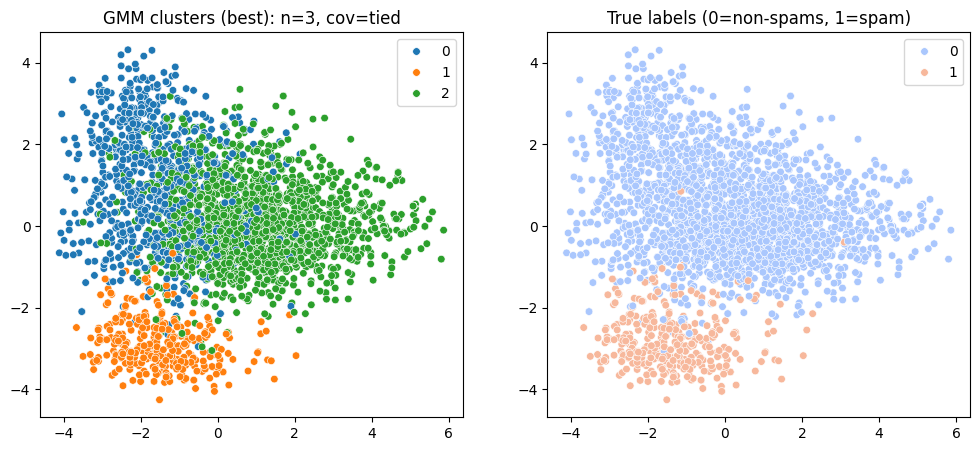

In [55]:
# ---  Visualisation : meilleur modèle (par ARI)---
best = df_results.iloc[0]
print("\nBest model by ARI:", best.to_dict())

best_gmm = GaussianMixture(n_components=int(best.n_components), covariance_type=best.covariance_type, random_state=42, n_init=5)
# Entrainement avec meilleur modèle
best_gmm.fit(X_train_reduced)
best_clusters = best_gmm.predict(X_train_reduced)

# projection en 2D
pca2 = PCA(n_components=2, random_state=42)
X2 = pca2.fit_transform(X_train_bert)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=best_clusters, palette='tab10', s=30, legend='full')
plt.title(f"GMM clusters (best): n={int(best.n_components)}, cov={best.covariance_type}")

plt.subplot(1,2,2)
sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=Y_train, palette='coolwarm', s=30, legend='full')
plt.title("True labels (0=non-spams, 1=spam)")
plt.show()


Le meilleur modèle obtenu utilise 3 composantes et une matrice de covariance tied, atteignant :

ARI = 0.33 implique 30% de similarité entre les clusters et les vrais label, ce qui est un peu moyen.

NMI = 0.47, donc la quantité d’information commune entre clustering et labels est moyen (47%). 

Accuracy (Hungarian) ≈ 0.69

Ces scores indiquent que les clusters retrouvés par le modèle contiennent une partie de la structure réelle, mais ne reproduisent pas parfaitement les deux classes spam/non-spam.

L’analyse visuelle confirme que :

les spam sont compacts et bien séparés, formant principalement un cluster distinct ;

les non-spams se distribuent en deux sous-groupes naturels, ce qui explique que le modèle préfère 3 clusters au lieu de 2.

En résumé, le GMM capture correctement la structure principale des données, notamment en isolant un cluster correspondant aux spam, mais les non-spam étant plus variés, le modèle crée deux sous-clusters. Les performances restent modérées, ce qui est attendu pour une tâche non supervisée sur des embeddings textuels.

### Question 15
Comparez ces modèles en utilisant le test du rapport de vraisemblance. Quel est le modèle plausible le plus simple ?

$m_0$ = modèle GMM simple
<br>
$m_1$ = modèle GMM complexe(plus riche)

Hypothèse:
<br>
$H_0$: $m_0$ est plausible
<br>
$H_1$: $m_1$ est vrai


In [56]:
from scipy.stats import chi2
import numpy as np
import pandas as pd

def gmm_num_params(gmm, p):
    """
    Calcule le nombre de paramètres d'un GMM.
    p = dimension des données (après PCA)
    """
    k = gmm.n_components
    cov_type = gmm.covariance_type

    # poids (k-1)
    params = k - 1
    
    # moyennes
    params += k * p

    # covariances
    if cov_type == "full":
        params += k * (p * (p + 1) / 2)
    elif cov_type == "tied":
        params += (p * (p + 1) / 2)
    elif cov_type == "diag":
        params += k * p
    elif cov_type == "spherical":
        params += k * 1

    return int(params)

# --- Préparation des modèles (repris de Q14) ---
models = {}  # stocker {name: model}

for n_comp in n_components_list:
    for cov in cov_types:
        name = f"gmm_{n_comp}_{cov}"
        gmm = GaussianMixture(n_components=n_comp, covariance_type=cov, random_state=42, n_init=5
        )
        gmm.fit(X_train_reduced)
        models[name] = gmm

# --- Comparaison via LRT ---
results = []

p = X_train_reduced.shape[1]  # dimension PCA

# Comparaison de chaque modèle avec celui juste plus simple
names = list(models.keys())

for i in range(len(names)):
    for j in range(i + 1, len(names)):
        m0 = models[names[i]]
        m1 = models[names[j]]

        # log-vraisemblances
        ll0 = m0.score(X_train_reduced) * X_train_reduced.shape[0]
        ll1 = m1.score(X_train_reduced) * X_train_reduced.shape[0]

        # LRT statistic
        LR = -2 * (ll0 - ll1)

        # degré de liberté
        df = abs(gmm_num_params(m1, p) - gmm_num_params(m0, p))

        # p-value
        pval = 1 - chi2.cdf(LR, df)

        results.append({
            "model_0": names[i],
            "model_1": names[j],
            "LR_stat": LR,
            "df": df,
            "p-value": pval
        })

df_lrt = pd.DataFrame(results).sort_values("p-value")
df_lrt


,model_0,model_1,LR_stat,df,p-value
0,gmm_2_spherical,gmm_2_diag,155122.703125,198,0.0
1,gmm_2_spherical,gmm_2_tied,144751.375000,5048,0.0
2,gmm_2_spherical,gmm_2_full,190467.468750,10098,0.0
3,gmm_2_spherical,gmm_3_spherical,23156.125000,102,0.0
4,gmm_2_spherical,gmm_3_diag,160086.500000,399,0.0
...,...,...,...,...,...
103,gmm_4_diag,gmm_5_tied,-10207.140625,4751,1.0
101,gmm_4_diag,gmm_5_spherical,-118531.734375,294,1.0
99,gmm_4_diag,gmm_4_tied,-11657.390625,4650,1.0
112,gmm_4_full,gmm_5_tied,-83406.781250,15049,1.0


In [57]:
simple_models = df_lrt[df_lrt['p-value'] > 0.05]

# 
plausible_simple_models = simple_models['model_0'].unique()

# 
print("Modèles plausibles les plus simples :", plausible_simple_models)
print("----------------------------------------------------------------------")
print(simple_models[:10])


Modèles plausibles les plus simples : ['gmm_2_diag' 'gmm_2_full' 'gmm_2_tied' 'gmm_3_full' 'gmm_3_tied'
 'gmm_3_diag' 'gmm_4_full' 'gmm_4_tied' 'gmm_4_diag' 'gmm_5_diag']
----------------------------------------------------------------------
       model_0          model_1        LR_stat    df  p-value
15  gmm_2_diag       gmm_2_tied  -10371.328125  4850      1.0
21  gmm_2_diag  gmm_4_spherical -121229.984375     6      1.0
17  gmm_2_diag  gmm_3_spherical -131966.578125    96      1.0
52  gmm_2_full       gmm_5_tied  -38296.718750  4747      1.0
43  gmm_2_full       gmm_3_diag  -30380.968750  9699      1.0
44  gmm_2_full       gmm_3_tied  -41788.406250  4949      1.0
46  gmm_2_full  gmm_4_spherical -156574.750000  9894      1.0
47  gmm_2_full       gmm_4_diag  -28089.578125  9498      1.0
38  gmm_2_tied  gmm_5_spherical -100905.218750  4742      1.0
34  gmm_2_tied  gmm_4_spherical -110858.656250  4844      1.0


`Test du rapport de vraisemble à 5%`
- pour gmm_2_diag en tant que $m_0$ contre les autres $m_0$, le test donne une p_value = 1, donc on garde $m_0$
- gmm_2_diag en tant que $m_1$ contre les autres $m_1$, le test donne une p_value = 0, donc on grejète les $m_0$ et on garde gmm_2_diag
- gmm_2_diag est le modèle le plus simple qui vérifie les deux conditions précédentes. gmm_2_tied et g_mmn_full sont un peu plus complexe que gmm_2_diag.

Conclusion : le modèle plausible le plus simple est gmm_2_diag (GMM à 2 composantes avec le type de covariance = diagonal)

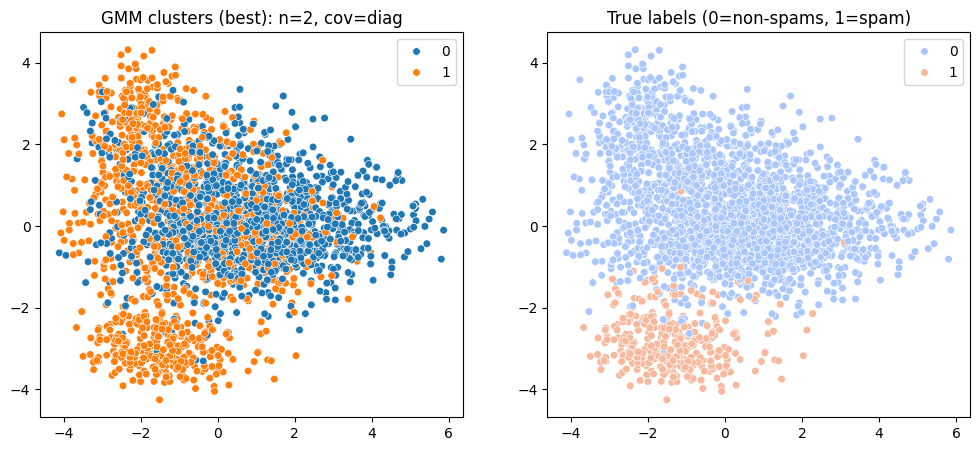

In [58]:
b_lrt = models["gmm_2_diag"]
b_lrt_clusters = b_lrt.predict(X_train_reduced)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=b_lrt_clusters, palette='tab10', s=30, legend='full')
plt.title(f"GMM clusters (best): n={int(b_lrt.n_components)}, cov={b_lrt.covariance_type}")

plt.subplot(1,2,2)
sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=Y_train, palette='coolwarm', s=30, legend='full')
plt.title("True labels (0=non-spams, 1=spam)")
plt.show()


On remarque quand-même  que gmm_2_diag confond les spams avec les non-spams; il est donc moins performant que gmn_3_tied (meilleur modèle trouvé à la question 14).